In [1]:
from imports import *

In [2]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
table = QTable.read('%s/data_hstha_nebulae_catalogue/all/nebulae_catalogue_wassociations.fits' %root_dir)

mask_hii = table['HII_class_v3_MUSE']==1
table = table[mask_hii]

table['gal_name', 'region_ID', 'region_ID_association_nuv_32pc', 'age_association_nuv_32pc', 'mass_association_nuv_32pc']

gal_name,region_ID,region_ID_association_nuv_32pc,age_association_nuv_32pc,mass_association_nuv_32pc
bytes32,float64,float64,float64,float64
IC5332,7.0,--,--,--
IC5332,9.0,--,--,--
IC5332,10.0,341.0,4.0,1726.7728454843584
IC5332,11.0,--,--,--
IC5332,15.0,--,--,--
IC5332,17.0,500.0,2.0,4139.695819420994
IC5332,18.0,493.0,10.0,1353.906565077747
IC5332,19.0,--,--,--
IC5332,21.0,491.0,8.0,1141.5279077297132


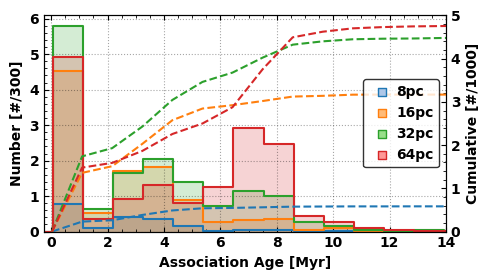

In [3]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data1 = table['age_association_nuv_08pc'].value
data2 = table['age_association_nuv_16pc'].value
data3 = table['age_association_nuv_32pc'].value
data4 = table['age_association_nuv_64pc'].value

bins = np.linspace(-1, 15, 16)

bins1, bins_cent1, hist1 = get_hist(data1, bins=bins, norm=False)
bins2, bins_cent2, hist2 = get_hist(data2, bins=bins, norm=False)
bins3, bins_cent3, hist3 = get_hist(data3, bins=bins, norm=False)
bins4, bins_cent4, hist4 = get_hist(data4, bins=bins, norm=False)

fig = plt.figure(figsize=(5, 2.9)) 

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(bins_cent1, hist1/300, ds='steps-mid', c='C0')
ax.fill_between(bins_cent1, hist1/300, alpha=0.2, step='mid', fc='C0')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[0], fc=colors2[0], label='8pc')

ax.plot(bins_cent2, hist2/300, ds='steps-mid', c='C1')
ax.fill_between(bins_cent2, hist2/300, alpha=0.2, step='mid', fc='C1')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[1], fc=colors2[1], label='16pc')

ax.plot(bins_cent3, hist3/300, ds='steps-mid', c='C2')
ax.fill_between(bins_cent3, hist3/300, alpha=0.2, step='mid', fc='C2')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[2], fc=colors2[2], label='32pc')

ax.plot(bins_cent4, hist4/300, ds='steps-mid', c='C3')
ax.fill_between(bins_cent4, hist4/300, alpha=0.2, step='mid', fc='C3')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[3], fc=colors2[3], label='64pc')

ylim = ax.get_ylim()
ax.set_ylim(0, ylim[-1])
ax.set_xlim(-0.25, 14)

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_xlabel('Association Age [Myr]')
ax.set_ylabel('Number [#/300]')

running_sum = np.cumsum(hist1)
ax2.plot(bins_cent1+0.5, running_sum/1000, ls='--', c='C0')
running_sum = np.cumsum(hist2)
ax2.plot(bins_cent2+0.5, running_sum/1000, ls='--', c='C1')
running_sum = np.cumsum(hist3)
ax2.plot(bins_cent3+0.5, running_sum/1000, ls='--', c='C2')
running_sum = np.cumsum(hist4)
ax2.plot(bins_cent4+0.5, running_sum/1000, ls='--', c='C3')

ylim = ax2.get_ylim()
ax2.set_ylim(0, ylim[-1])
ax2.set_ylabel('Cumulative [#/1000]')

ax2.legend(loc='center right', edgecolor='black', handletextpad=0)

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/hist_associations_nuv_agelog_all.pdf', dpi=250, bbox_inches='tight')

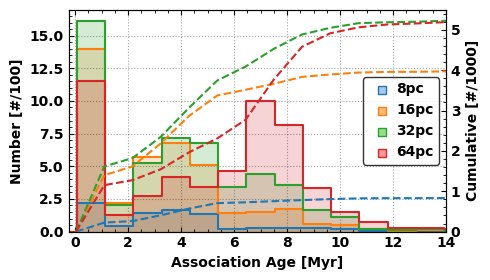

In [4]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data1 = table['age_association_v_08pc'].value
data2 = table['age_association_v_16pc'].value
data3 = table['age_association_v_32pc'].value
data4 = table['age_association_v_64pc'].value

bins = np.linspace(-1, 15, 16)

bins1, bins_cent1, hist1 = get_hist(data1, bins=bins, norm=False)
bins2, bins_cent2, hist2 = get_hist(data2, bins=bins, norm=False)
bins3, bins_cent3, hist3 = get_hist(data3, bins=bins, norm=False)
bins4, bins_cent4, hist4 = get_hist(data4, bins=bins, norm=False)

fig = plt.figure(figsize=(5, 2.9)) 

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(bins_cent1, hist1/100, ds='steps-mid', c='C0')
ax.fill_between(bins_cent1, hist1/100, alpha=0.2, step='mid', fc='C0')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[0], fc=colors2[0], label='8pc')

ax.plot(bins_cent2, hist2/100, ds='steps-mid', c='C1')
ax.fill_between(bins_cent2, hist2/100, alpha=0.2, step='mid', fc='C1')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[1], fc=colors2[1], label='16pc')

ax.plot(bins_cent3, hist3/100, ds='steps-mid', c='C2')
ax.fill_between(bins_cent3, hist3/100, alpha=0.2, step='mid', fc='C2')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[2], fc=colors2[2], label='32pc')

ax.plot(bins_cent4, hist4/100, ds='steps-mid', c='C3')
ax.fill_between(bins_cent4, hist4/100, alpha=0.2, step='mid', fc='C3')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[3], fc=colors2[3], label='64pc')

ylim = ax.get_ylim()
ax.set_ylim(0, ylim[-1])
ax.set_xlim(-0.25, 14)

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_xlabel('Association Age [Myr]')
ax.set_ylabel('Number [#/100]')

running_sum = np.cumsum(hist1)
ax2.plot(bins_cent1+0.5, running_sum/1000, ls='--', c='C0')
running_sum = np.cumsum(hist2)
ax2.plot(bins_cent2+0.5, running_sum/1000, ls='--', c='C1')
running_sum = np.cumsum(hist3)
ax2.plot(bins_cent3+0.5, running_sum/1000, ls='--', c='C2')
running_sum = np.cumsum(hist4)
ax2.plot(bins_cent4+0.5, running_sum/1000, ls='--', c='C3')

ylim = ax2.get_ylim()
ax2.set_ylim(0, ylim[-1])
ax2.set_ylabel('Cumulative [#/1000]')

ax2.legend(loc='center right', edgecolor='black', handletextpad=0)

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/hist_associations_v_agelog_all.pdf', dpi=250, bbox_inches='tight')

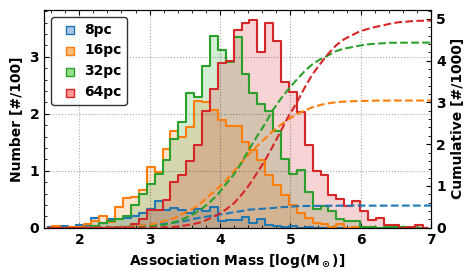

In [5]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data1 = np.log10(table['mass_association_nuv_08pc'].value)
data2 = np.log10(table['mass_association_nuv_16pc'].value)
data3 = np.log10(table['mass_association_nuv_32pc'].value)
data4 = np.log10(table['mass_association_nuv_64pc'].value)

bins = np.linspace(1.5, 7, 50)

bins1, bins_cent1, hist1 = get_hist(data1, bins=bins, norm=False)
bins2, bins_cent2, hist2 = get_hist(data2, bins=bins, norm=False)
bins3, bins_cent3, hist3 = get_hist(data3, bins=bins, norm=False)
bins4, bins_cent4, hist4 = get_hist(data4, bins=bins, norm=False)

fig = plt.figure(figsize=(5, 2.9)) 

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(bins_cent1, hist1/100, ds='steps-mid', c='C0')
ax.fill_between(bins_cent1, hist1/100, alpha=0.2, step='mid', fc='C0')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[0], fc=colors2[0], label='8pc')

ax.plot(bins_cent2, hist2/100, ds='steps-mid', c='C1')
ax.fill_between(bins_cent2, hist2/100, alpha=0.2, step='mid', fc='C1')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[1], fc=colors2[1], label='16pc')

ax.plot(bins_cent3, hist3/100, ds='steps-mid', c='C2')
ax.fill_between(bins_cent3, hist3/100, alpha=0.2, step='mid', fc='C2')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[2], fc=colors2[2], label='32pc')

ax.plot(bins_cent4, hist4/100, ds='steps-mid', c='C3')
ax.fill_between(bins_cent4, hist4/100, alpha=0.2, step='mid', fc='C3')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[3], fc=colors2[3], label='64pc')

ylim = ax.get_ylim()
ax.set_ylim(0, ylim[-1])
ax.set_xlim(1.5, 7)

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_xlabel('Association Mass [log(M$_\odot$)]')
ax.set_ylabel('Number [#/100]')

running_sum = np.cumsum(hist1)
ax2.plot(bins_cent1+0.5, running_sum/1000, ls='--', c='C0')
running_sum = np.cumsum(hist2)
ax2.plot(bins_cent2+0.5, running_sum/1000, ls='--', c='C1')
running_sum = np.cumsum(hist3)
ax2.plot(bins_cent3+0.5, running_sum/1000, ls='--', c='C2')
running_sum = np.cumsum(hist4)
ax2.plot(bins_cent4+0.5, running_sum/1000, ls='--', c='C3')

ylim = ax2.get_ylim()
ax2.set_ylim(0, ylim[-1])
ax2.set_ylabel('Cumulative [#/1000]')

ax2.legend(loc='upper left', edgecolor='black', handletextpad=0)

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/hist_associations_nuv_masslog_all.pdf', dpi=250, bbox_inches='tight')

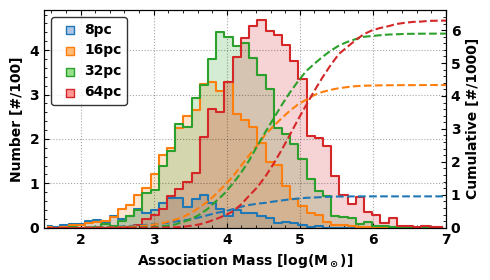

In [6]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data1 = np.log10(table['mass_association_v_08pc'].value)
data2 = np.log10(table['mass_association_v_16pc'].value)
data3 = np.log10(table['mass_association_v_32pc'].value)
data4 = np.log10(table['mass_association_v_64pc'].value)

bins = np.linspace(1.5, 7, 50)

bins1, bins_cent1, hist1 = get_hist(data1, bins=bins, norm=False)
bins2, bins_cent2, hist2 = get_hist(data2, bins=bins, norm=False)
bins3, bins_cent3, hist3 = get_hist(data3, bins=bins, norm=False)
bins4, bins_cent4, hist4 = get_hist(data4, bins=bins, norm=False)

fig = plt.figure(figsize=(5, 2.9)) 

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(bins_cent1, hist1/100, ds='steps-mid', c='C0')
ax.fill_between(bins_cent1, hist1/100, alpha=0.2, step='mid', fc='C0')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[0], fc=colors2[0], label='8pc')

ax.plot(bins_cent2, hist2/100, ds='steps-mid', c='C1')
ax.fill_between(bins_cent2, hist2/100, alpha=0.2, step='mid', fc='C1')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[1], fc=colors2[1], label='16pc')

ax.plot(bins_cent3, hist3/100, ds='steps-mid', c='C2')
ax.fill_between(bins_cent3, hist3/100, alpha=0.2, step='mid', fc='C2')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[2], fc=colors2[2], label='32pc')

ax.plot(bins_cent4, hist4/100, ds='steps-mid', c='C3')
ax.fill_between(bins_cent4, hist4/100, alpha=0.2, step='mid', fc='C3')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[3], fc=colors2[3], label='64pc')

ylim = ax.get_ylim()
ax.set_ylim(0, ylim[-1])
ax.set_xlim(1.5, 7)

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_xlabel('Association Mass [log(M$_\odot$)]')
ax.set_ylabel('Number [#/100]')

running_sum = np.cumsum(hist1)
ax2.plot(bins_cent1+0.5, running_sum/1000, ls='--', c='C0')
running_sum = np.cumsum(hist2)
ax2.plot(bins_cent2+0.5, running_sum/1000, ls='--', c='C1')
running_sum = np.cumsum(hist3)
ax2.plot(bins_cent3+0.5, running_sum/1000, ls='--', c='C2')
running_sum = np.cumsum(hist4)
ax2.plot(bins_cent4+0.5, running_sum/1000, ls='--', c='C3')

ylim = ax2.get_ylim()
ax2.set_ylim(0, ylim[-1])
ax2.set_ylabel('Cumulative [#/1000]')

ax2.legend(loc='upper left', edgecolor='black', handletextpad=0)

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/hist_associations_v_masslog_all.pdf', dpi=250, bbox_inches='tight')